In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset into google colab
df=pd.read_csv('/content/drive/MyDrive/Train.csv')

In [ ]:
# Importing the test dateset which the model will be used to make predictions
df_test=pd.read_csv('/content/drive/MyDrive/Test.csv')

In [ ]:
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0


In [ ]:
df_test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [ ]:
# Checking for the data types that are present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [ ]:
# Checking for the categories present per categorical variable
print(df.apply(lambda col: col.unique()))

ID                       [tour_0, tour_10, tour_1000, tour_1002, tour_1...
country                  [SWIZERLAND, UNITED KINGDOM, CHINA, SOUTH AFRI...
age_group                                        [45-64, 25-44, 1-24, 65+]
travel_with              [Friends/Relatives, nan, Alone, Spouse, Childr...
total_female             [1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 12.0, 10.0, 6.0...
total_male               [1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, 15.0,...
purpose                  [Leisure and Holidays, Visiting Friends and Re...
main_activity            [Wildlife tourism, Cultural tourism, Mountain ...
info_source              [Friends, relatives, others, Travel, agent, to...
tour_arrangement                               [Independent, Package Tour]
package_transport_int                                            [No, Yes]
package_accomodation                                          [No, Yes,  ]
package_food                                                     [No, Yes]
package_transport_tz     

In [ ]:
# Checking how many values are missing per column
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [ ]:
# Checking the number of missing values in the test dataset per column
df_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [ ]:
# Checking for the unique variables present in the travel_with column in order to decide what to fill with
df['travel_with'].unique()

array(['Friends/Relatives', nan, 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

In [ ]:
# Filling the total_female and total_male column with 0 for the missing values for them to be used in filling up the travel with column
df['total_female']=df['total_female'].fillna(0)
df['total_male']=df['total_male'].fillna(0)
df['total_travellers']=df['total_male']+df['total_female']

In [ ]:
# Filling the missing values of the test dataset
df_test['total_female']=df_test['total_female'].fillna(0)
df_test['total_male']=df_test['total_male'].fillna(0)
df_test['total_travellers']=df_test['total_male']+df_test['total_female']

In [ ]:
df['total_travellers'].unique()

array([ 2.,  1.,  5.,  4.,  3., 10.,  0.,  6.,  7.,  8., 13., 12.,  9.,
       11., 15., 30., 16., 20., 22., 93., 19., 18., 14.])

In [ ]:
# dropping the total_travellers column that has 0 travellers in it since if there were no one who travelled then there is no information about expenditure
df = df[df.total_travellers != 0]

In [ ]:
# Dropping rows where there are no total_travellers since if there were no one who travelled then there is no information about expenditure
df_test = df_test[df_test.total_travellers != 0]

In [ ]:
#A function that creates travel_with afresh using the values of the total_travellers column
def recreate_total_travellers(mydf):
  if  mydf['total_travellers']==1:
    return 'Alone'
  else:
    return 'Family/Friends'


In [ ]:
# recreating the travel_with column of the df dataset by using the recreate_total_travellers function
df['travel_with']=df.apply (lambda mydf: recreate_total_travellers(mydf), axis=1)

In [ ]:
# recreating the travel_with column of the df_test dataset by using the recreate_total_travellers function
df_test['travel_with']=df_test.apply (lambda mydf: recreate_total_travellers(mydf), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Checking the unique values of the df dataset after recreating the travel_with column
df['travel_with'].unique()

array(['Family/Friends', 'Alone'], dtype=object)

In [ ]:
# Checking the unique values of the df_test dataset after recreating the travel_with column
df_test['travel_with'].unique()

array(['Family/Friends', 'Alone'], dtype=object)

In [ ]:
# Listing the top 10 highest spending countries in terms of the total amount that their tourists spent
highest_spenders=df.groupby('country')['total_cost'].sum().astype('int').sort_values(ascending=False)
top_10_highest_spenders=highest_spenders.reset_index().head(10)
top_10_highest_spenders

,country,total_cost
0,UNITED STATES OF AMERICA,8831294653
1,UNITED KINGDOM,3803830422
2,ITALY,3762160275
3,FRANCE,3322782698
4,AUSTRALIA,2721828429
5,SOUTH AFRICA,2590827034
6,GERMANY,2150952749
7,SPAIN,1678895688
8,CANADA,1446096273
9,NETHERLANDS,1250217144


[None]

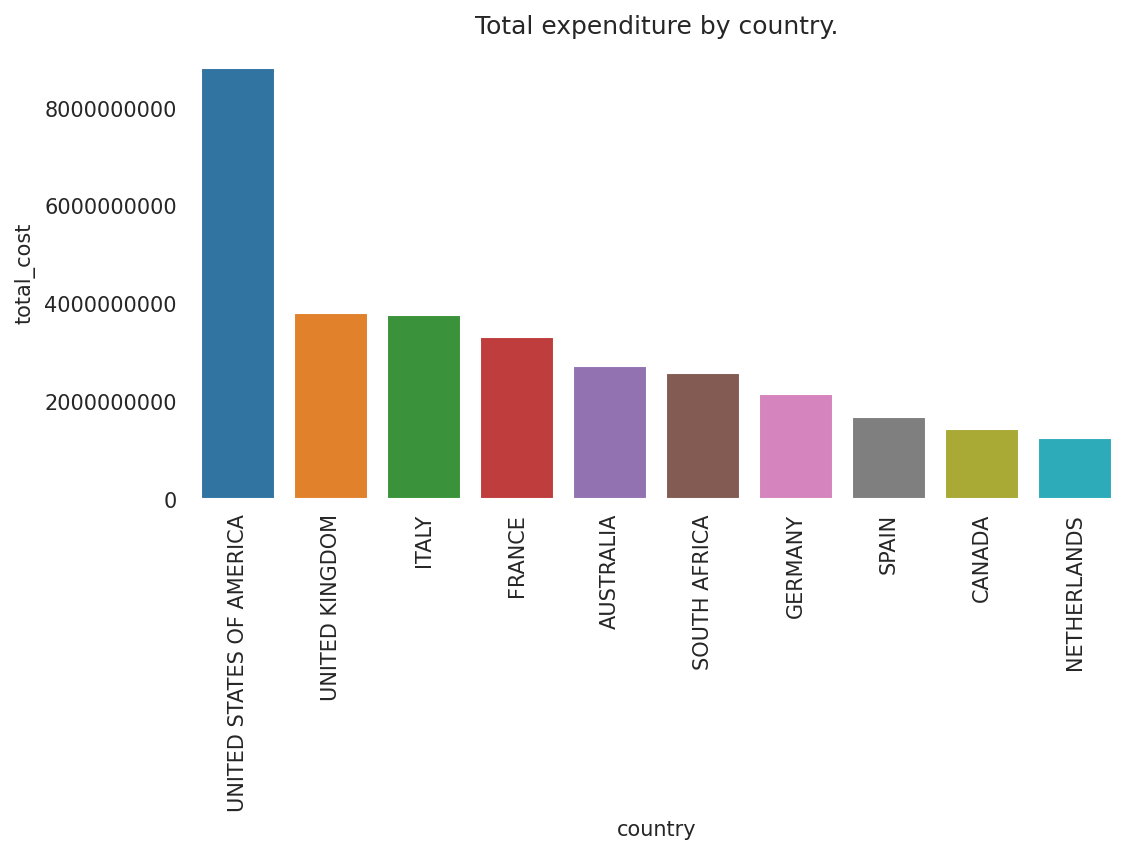

In [ ]:
# A barplot of the top 10 countries in terms of total expenditure by tourists
plt.figure(figsize=(8,4),dpi=150)
plt.ticklabel_format(style='plain')
sns.barplot(x='country',y='total_cost',data=top10_highest_spenders)
plt.xticks(rotation=90)
plt.title('Total expenditure by country.')
plt.gca().set(frame_on=False)

In [ ]:
# Dataframe for the purpose of visiting Tanzania and rhe total money that was spent
visit_expenditure=df.groupby('purpose')['total_cost'].sum().astype('int').sort_values(ascending=False).reset_index()
visit_expenditure

,purpose,total_cost
0,Leisure and Holidays,33738870070
1,Visiting Friends and Relatives,2019560962
2,Business,1195515965
3,Meetings and Conference,761359095
4,Volunteering,529245650
5,Scientific and Academic,350783147
6,Other,203795783


[None]

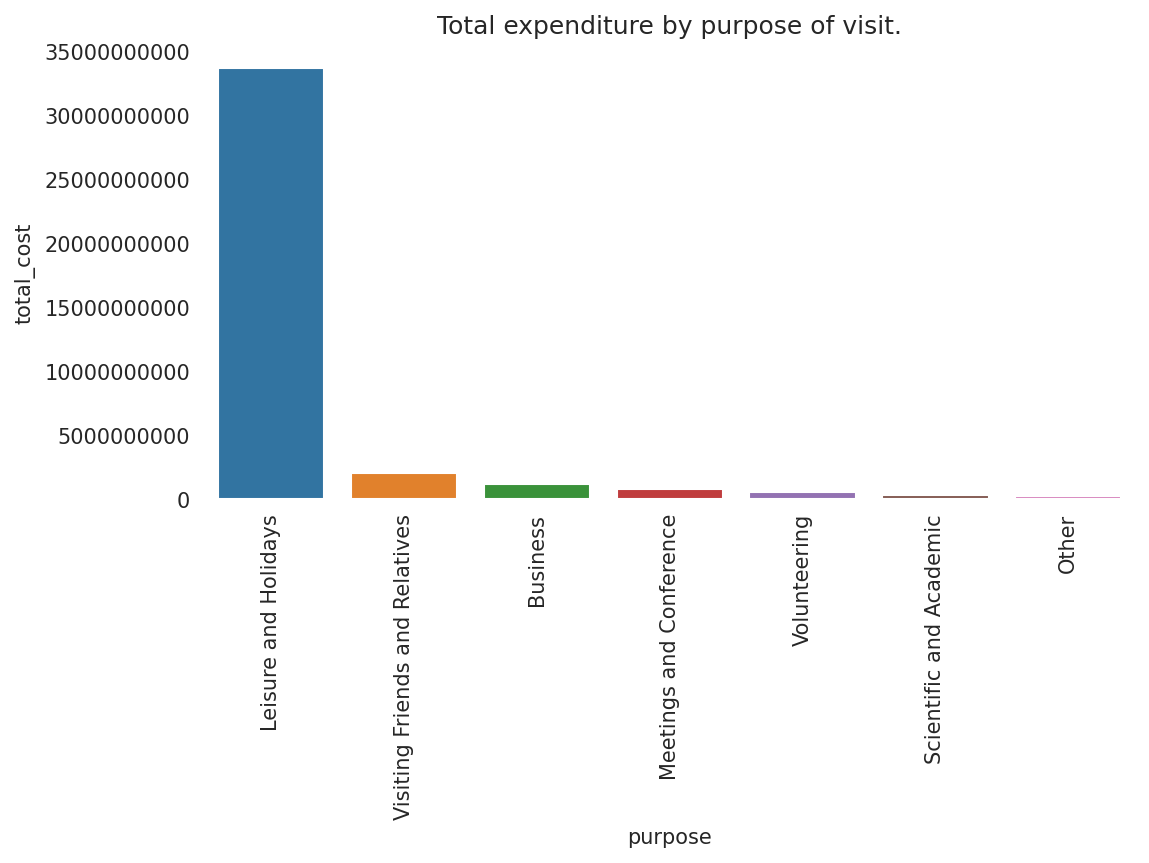

In [ ]:
# A barplot of the top 10 countries in terms of total expenditure by tourists
plt.figure(figsize=(8,4),dpi=150)
plt.ticklabel_format(style='plain')
sns.barplot(x='purpose',y='total_cost',data=visit_expenditure)
plt.title('Total expenditure by purpose of visit.')
plt.xticks(rotation=90)
plt.gca().set(frame_on=False)

[None]

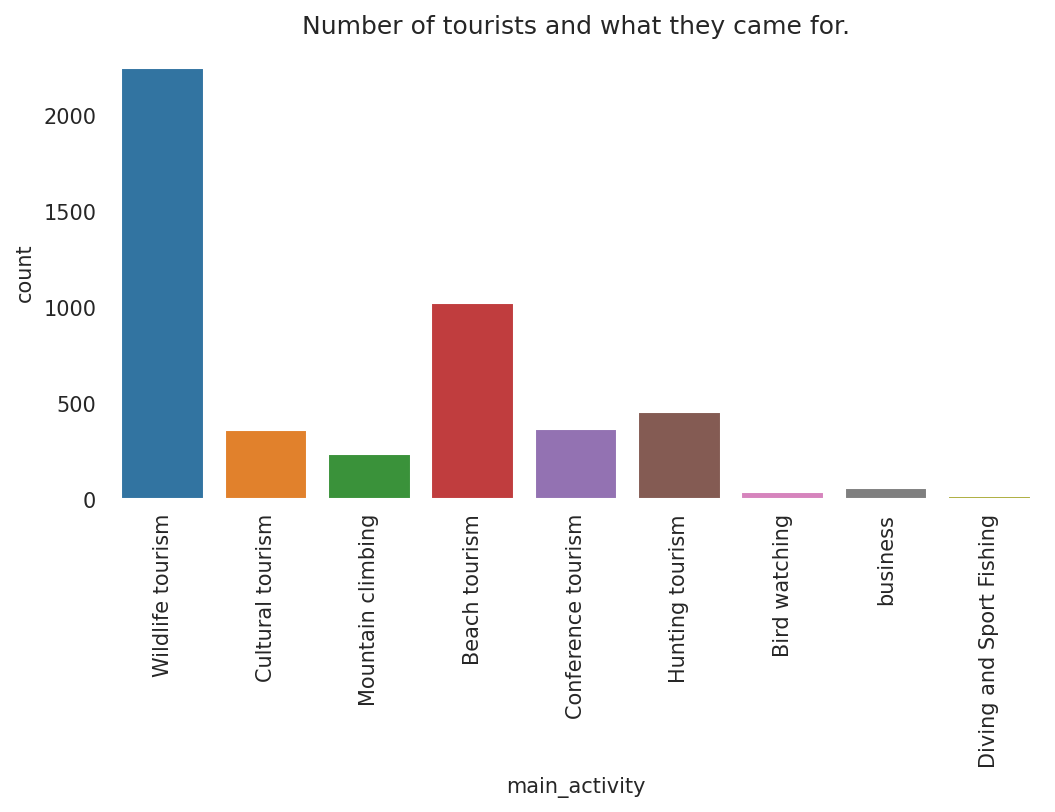

In [ ]:
# Which activity attracts the highest number of tourists
plt.figure(figsize=(8,4),dpi=150)
plt.ticklabel_format(style='plain')
sns.countplot(x='main_activity',data=df)
plt.title('Number of tourists and what they came for.')
plt.xticks(rotation=90)
plt.gca().set(frame_on=False)

[None]

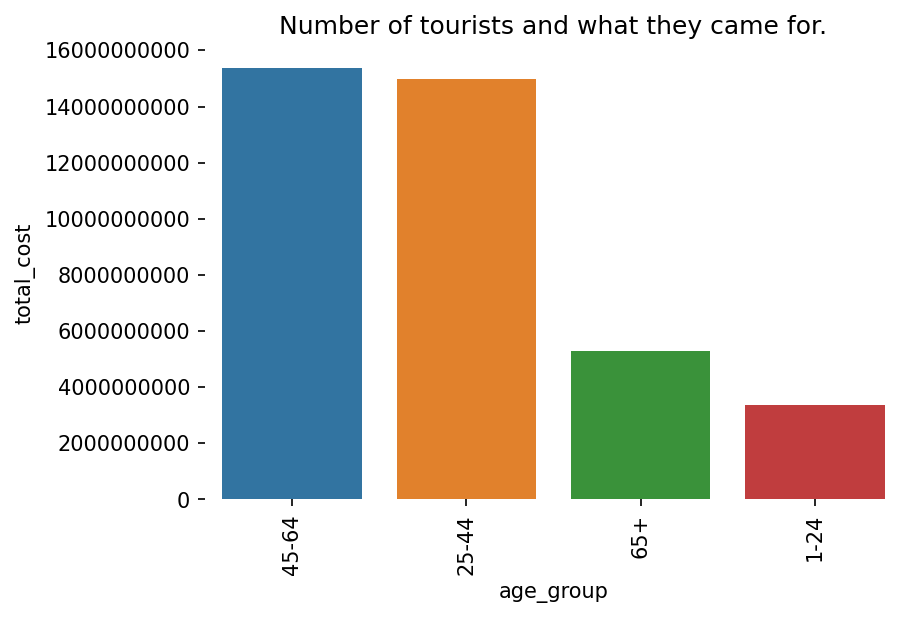

In [ ]:
# Total revenues generated as per age group of the tourists
expenditure_by_age_group=df.groupby('age_group')['total_cost'].sum().astype('int').sort_values(ascending=False).reset_index()
plt.figure(figsize=(6,4),dpi=150)
plt.ticklabel_format(style='plain')
sns.barplot(x='age_group',y='total_cost',data=expenditure_by_age_group)
plt.title('Number of tourists and what they came for.')
plt.xticks(rotation=90)
plt.gca().set(frame_on=False)

In [ ]:
# Dropping the most_impressing  column in the df dataset since it's not an important predictor to a prospective traveller
df=df.drop('most_impressing',axis=1)

In [ ]:
# Dropping the most_impressing  column in the df_test since it's not an important predictor to a prospective traveller
df_test=df_test.drop('most_impressing',axis=1)

In [ ]:
# Dropping the country column in order to avoid many dummy variables which would lead to multicollinearity hence overfitting in the regression model
df=df.drop('country',axis=1)

In [ ]:
df_test=df_test.drop('country',axis=1)

In [ ]:
# A histogram to show the distribution of the total cost
import plotly.express as px
fig = px.histogram(df, x="total_cost",nbins=20)
fig.show()

In [ ]:
# Lists which will help in reducing the number of factors in the main_activity column 
wildlife=['Wildlife tourism','Bird watching','Hunting tourism']
beach=['Beach tourism','Diving and Sport Fishing']

In [ ]:
# Reducing the number of factors in the main_activity column of the df dataset
df['main_activity']=df['main_activity'].replace({'Bird watching':'Wildlife tourism',
                                                 'Hunting tourism':'Wildlife tourism', 
                                                 'Diving and Sport Fishing': 'Beach tourism','Conference tourism':'business'})

In [ ]:
# Reducing the number of factors in the main_activity column of the df_test dataset
df_test['main_activity']=df_test['main_activity'].replace({'Bird watching':'Wildlife tourism','Hunting tourism':'Wildlife tourism', 'Diving and Sport Fishing': 'Beach tourism','Conference tourism':'business'})

In [ ]:
# Confirming if the main_activity factors have been reduced in the df dataset
df['main_activity'].unique()

array(['Wildlife tourism', 'Cultural tourism', 'Mountain climbing',
       'Beach tourism', 'business'], dtype=object)

In [ ]:
# Confirming if the main_activity factors have been reduced in the df_test dataset
df_test['main_activity'].unique()

array(['Wildlife tourism', 'Beach tourism', 'Cultural tourism',
       'Mountain climbing', 'business'], dtype=object)

In [ ]:
# Checking for the unique factors in the df dataset
df['info_source'].unique()

array(['Friends, relatives', 'others', 'Travel, agent, tour operator',
       'Radio, TV, Web', 'Tanzania Mission Abroad', 'inflight magazines',
       'Newspaper, magazines,brochures', 'Trade fair'], dtype=object)

In [ ]:
# A function that encodes the info_source variables reducing the number of factor levels to 2
def encode_info_source(mydf):
  if mydf['info_source']=='Friends, relatives':
    return 'referral'
  else:
    return 'advertisement'

In [ ]:
# Applying the encode_info_source foe encoding the info_source variable of the df dataframe
df['info_source']=df.apply (lambda mydf: encode_info_source(mydf), axis=1)

In [ ]:
# Applying the encode_info_source foe encoding the info_source variable of the df_test dataframe
df_test['info_source']=df_test.apply (lambda mydf: encode_info_source(mydf), axis=1)

In [ ]:
# Checking if the encode_info_source function took effect
df['info_source'].unique()

array(['referral', 'advertisement'], dtype=object)

In [ ]:
# Checking for the count per factor of the package_accomodation column in order to spot an anomaly if it exists
df['package_accomodation'].value_counts()

No     2595
Yes    2196
          1
Name: package_accomodation, dtype: int64

In [ ]:
# Dropping the row where package accomodation is '' in the df dataframe
df=df[df.package_accomodation!=' ']

In [ ]:
# Dropping the row where package accomodation is '' in the df_test dataframe
df_test=df_test[df_test.package_accomodation!=' ']

In [ ]:
# Encoding the payment_mode column by replacing the 'Other' form of payment of the df dataframe with cash
df['payment_mode']=df['payment_mode'].replace({'Other':'Cash'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Encoding the payment_mode column by replacing the 'Other' form of payment of the df_test dataframe with cash
df_test['payment_mode']=df_test['payment_mode'].replace({'Other':'Cash'})

In [ ]:
df.head(1)

,ID,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_travellers
0,tour_0,45-64,Family/Friends,1.0,1.0,Leisure and Holidays,Wildlife tourism,referral,Independent,No,...,No,No,No,No,13,0,Cash,No,674602.5,2.0


In [ ]:
# Converting the rest of the variables to categorical variables of the df dataframe
df=pd.get_dummies(df.drop('ID',axis=1),drop_first=True)

In [ ]:
# Converting the rest of the variables to categorical variables of the df_test dataframe
df_test=pd.get_dummies(df_test.drop('ID',axis=1),drop_first=True)

In [ ]:
# A view of all the variables to see if they were converted into dummy variables in df_test df_test dataframe
pd.set_option('display.max_rows', None)
print(df_test.apply(lambda col: col.unique()))

total_female                              [1.0, 0.0, 3.0, 2.0, 4.0, 5.0, 9.0, 10.0, 7.0,...
total_male                                [1.0, 4.0, 0.0, 2.0, 3.0, 5.0, 10.0, 7.0, 6.0,...
night_mainland                            [10, 13, 7, 0, 55, 9, 26, 3, 30, 6, 21, 5, 2, ...
night_zanzibar                            [3, 0, 14, 4, 9, 6, 7, 15, 2, 5, 13, 12, 11, 1...
total_travellers                          [2.0, 4.0, 3.0, 1.0, 5.0, 6.0, 10.0, 20.0, 14....
age_group_25-44                                                                      [0, 1]
age_group_45-64                                                                      [1, 0]
age_group_65+                                                                        [0, 1]
travel_with_Family/Friends                                                           [1, 0]
purpose_Leisure and Holidays                                                         [1, 0]
purpose_Meetings and Conference                                                 

In [ ]:
# Looking at all the variables after feature engineering in the df dataframe
pd.set_option('display.max_rows', None)
print(df.apply(lambda col: col.unique()))

total_female                              [1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 12.0, 10.0, 6.0...
total_male                                [1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 15.0, 17.0...
night_mainland                            [13, 14, 1, 11, 7, 9, 10, 4, 5, 17, 30, 2, 0, ...
night_zanzibar                            [0, 7, 31, 4, 3, 2, 11, 6, 5, 10, 1, 30, 13, 9...
total_cost                                [674602.5, 3214906.5, 3315000.0, 7790250.0, 16...
total_travellers                          [2.0, 1.0, 5.0, 4.0, 3.0, 10.0, 6.0, 7.0, 8.0,...
age_group_25-44                                                                      [0, 1]
age_group_45-64                                                                      [1, 0]
age_group_65+                                                                        [0, 1]
travel_with_Family/Friends                                                           [1, 0]
purpose_Leisure and Holidays                                                    

In [ ]:
# A summary of the target variable 
df['total_cost'].describe().astype('int')

count        4791
mean      8098188
std      12209279
min         49000
25%        810075
50%       3362900
75%       9837262
max      99532875
Name: total_cost, dtype: int64

In [ ]:
# A boxplot that shows the distribution of the total_cost
import plotly.express as px
fig = px.box(df, y="total_cost")
fig.show()

In [ ]:
# Removing outliers that would affect the regression model that would be used in predicting the total_cost by dropping the datapoints above the 75th percentile
df=df[df['total_cost']<=np.quantile(df['total_cost'],.75)]

In [ ]:
df.head(5)

,total_female,total_male,night_mainland,night_zanzibar,total_cost,total_travellers,age_group_25-44,age_group_45-64,age_group_65+,travel_with_Family/Friends,...,package_transport_int_Yes,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,payment_mode_Credit Card,payment_mode_Travellers Cheque,first_trip_tz_Yes
0,1.0,1.0,13,0,674602.5,2.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,14,7,3214906.5,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1.0,1,31,3315000.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,11,0,7790250.0,2.0,1,0,0,1,...,0,1,1,1,1,1,0,0,0,1
4,1.0,0.0,7,4,1657500.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


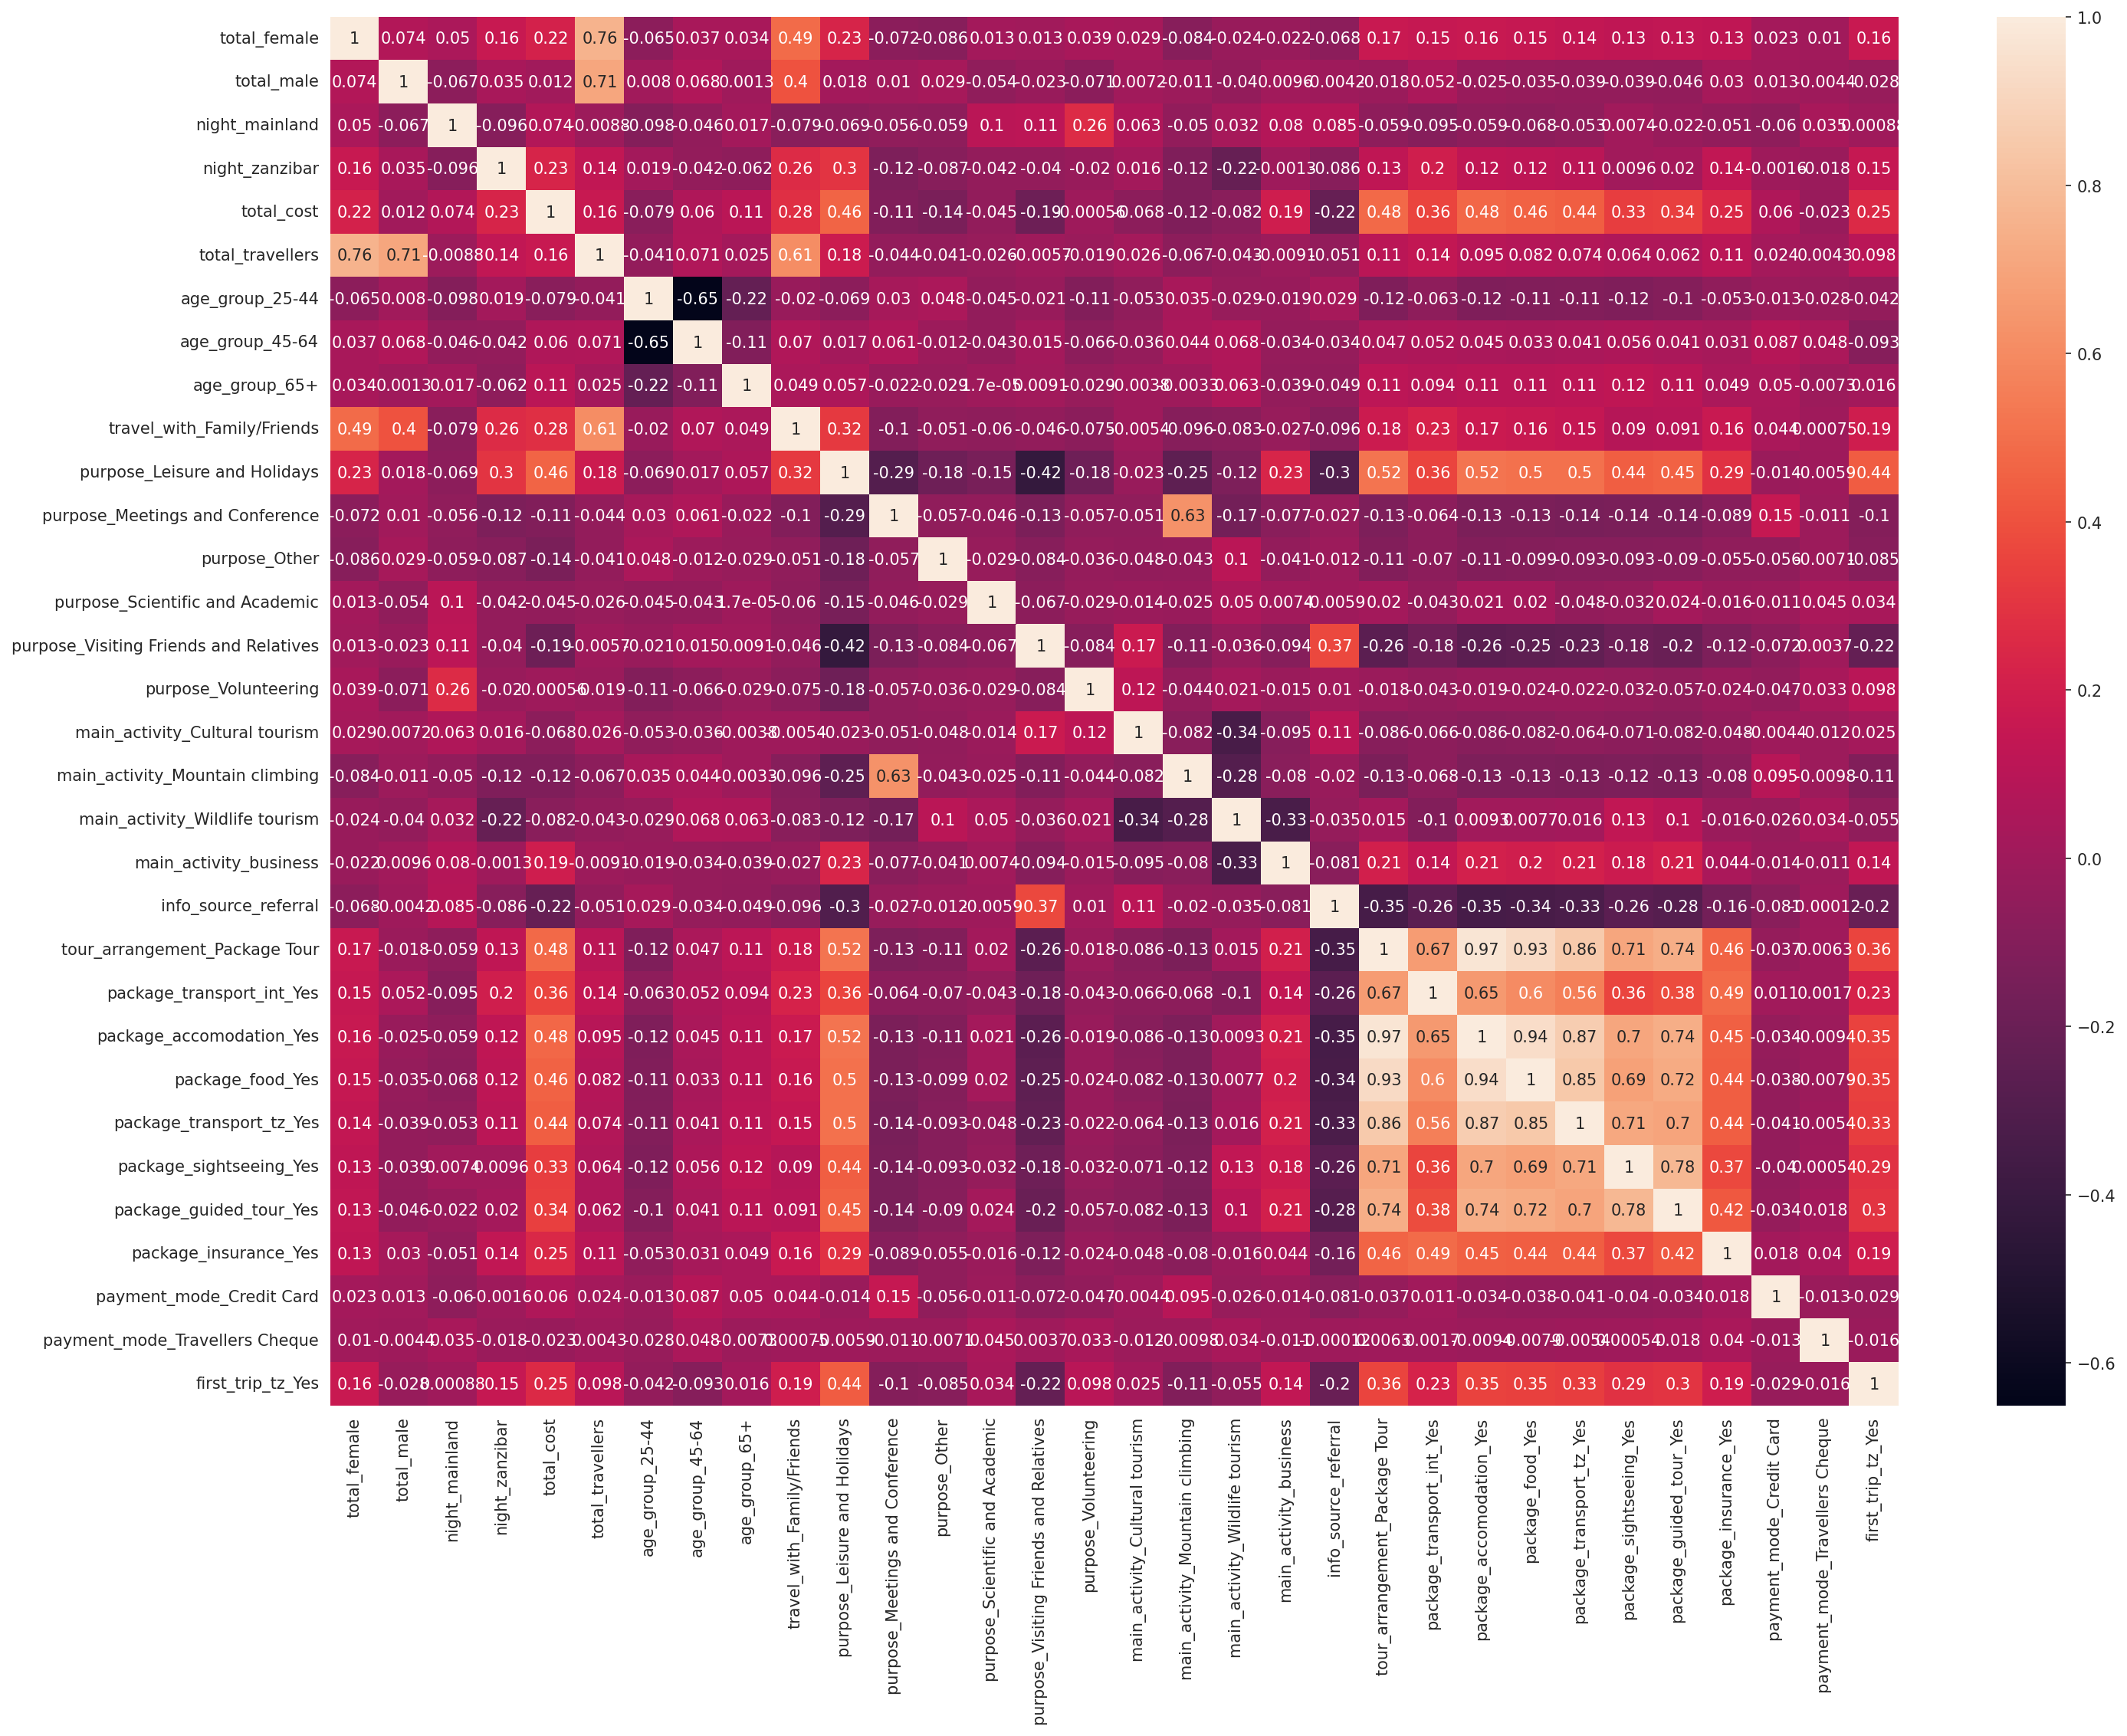

In [ ]:
# A correlation plot with all features and the labels of the df dataset
plt.figure(figsize=(22,16),dpi=150)
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Checking for all features and the label of the engineered df dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 4807
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_female                            3593 non-null   float64
 1   total_male                              3593 non-null   float64
 2   night_mainland                          3593 non-null   int64  
 3   night_zanzibar                          3593 non-null   int64  
 4   total_cost                              3593 non-null   float64
 5   total_travellers                        3593 non-null   float64
 6   age_group_25-44                         3593 non-null   uint8  
 7   age_group_45-64                         3593 non-null   uint8  
 8   age_group_65+                           3593 non-null   uint8  
 9   travel_with_Family/Friends              3593 non-null   uint8  
 10  purpose_Leisure and Holidays            3593 non-null   uint

In [ ]:
# Dropping some of the columns due to their high correlation with other columns  in the in order to avoid overfitting of the regression model 
df=df.drop(['total_female','total_male','total_travellers','package_accomodation_Yes',
            'package_food_Yes','package_transport_tz_Yes','package_sightseeing_Yes',
            'package_guided_tour_Yes','package_transport_int_Yes'],axis=1)

In [ ]:
# Dropping some of the variables in the test dataset since they will not be required in prediction
df_test=df_test.drop(['total_female','total_male','total_travellers','package_accomodation_Yes',
                      'package_food_Yes','package_transport_tz_Yes','package_sightseeing_Yes',
                      'package_guided_tour_Yes','package_transport_int_Yes'],axis=1)

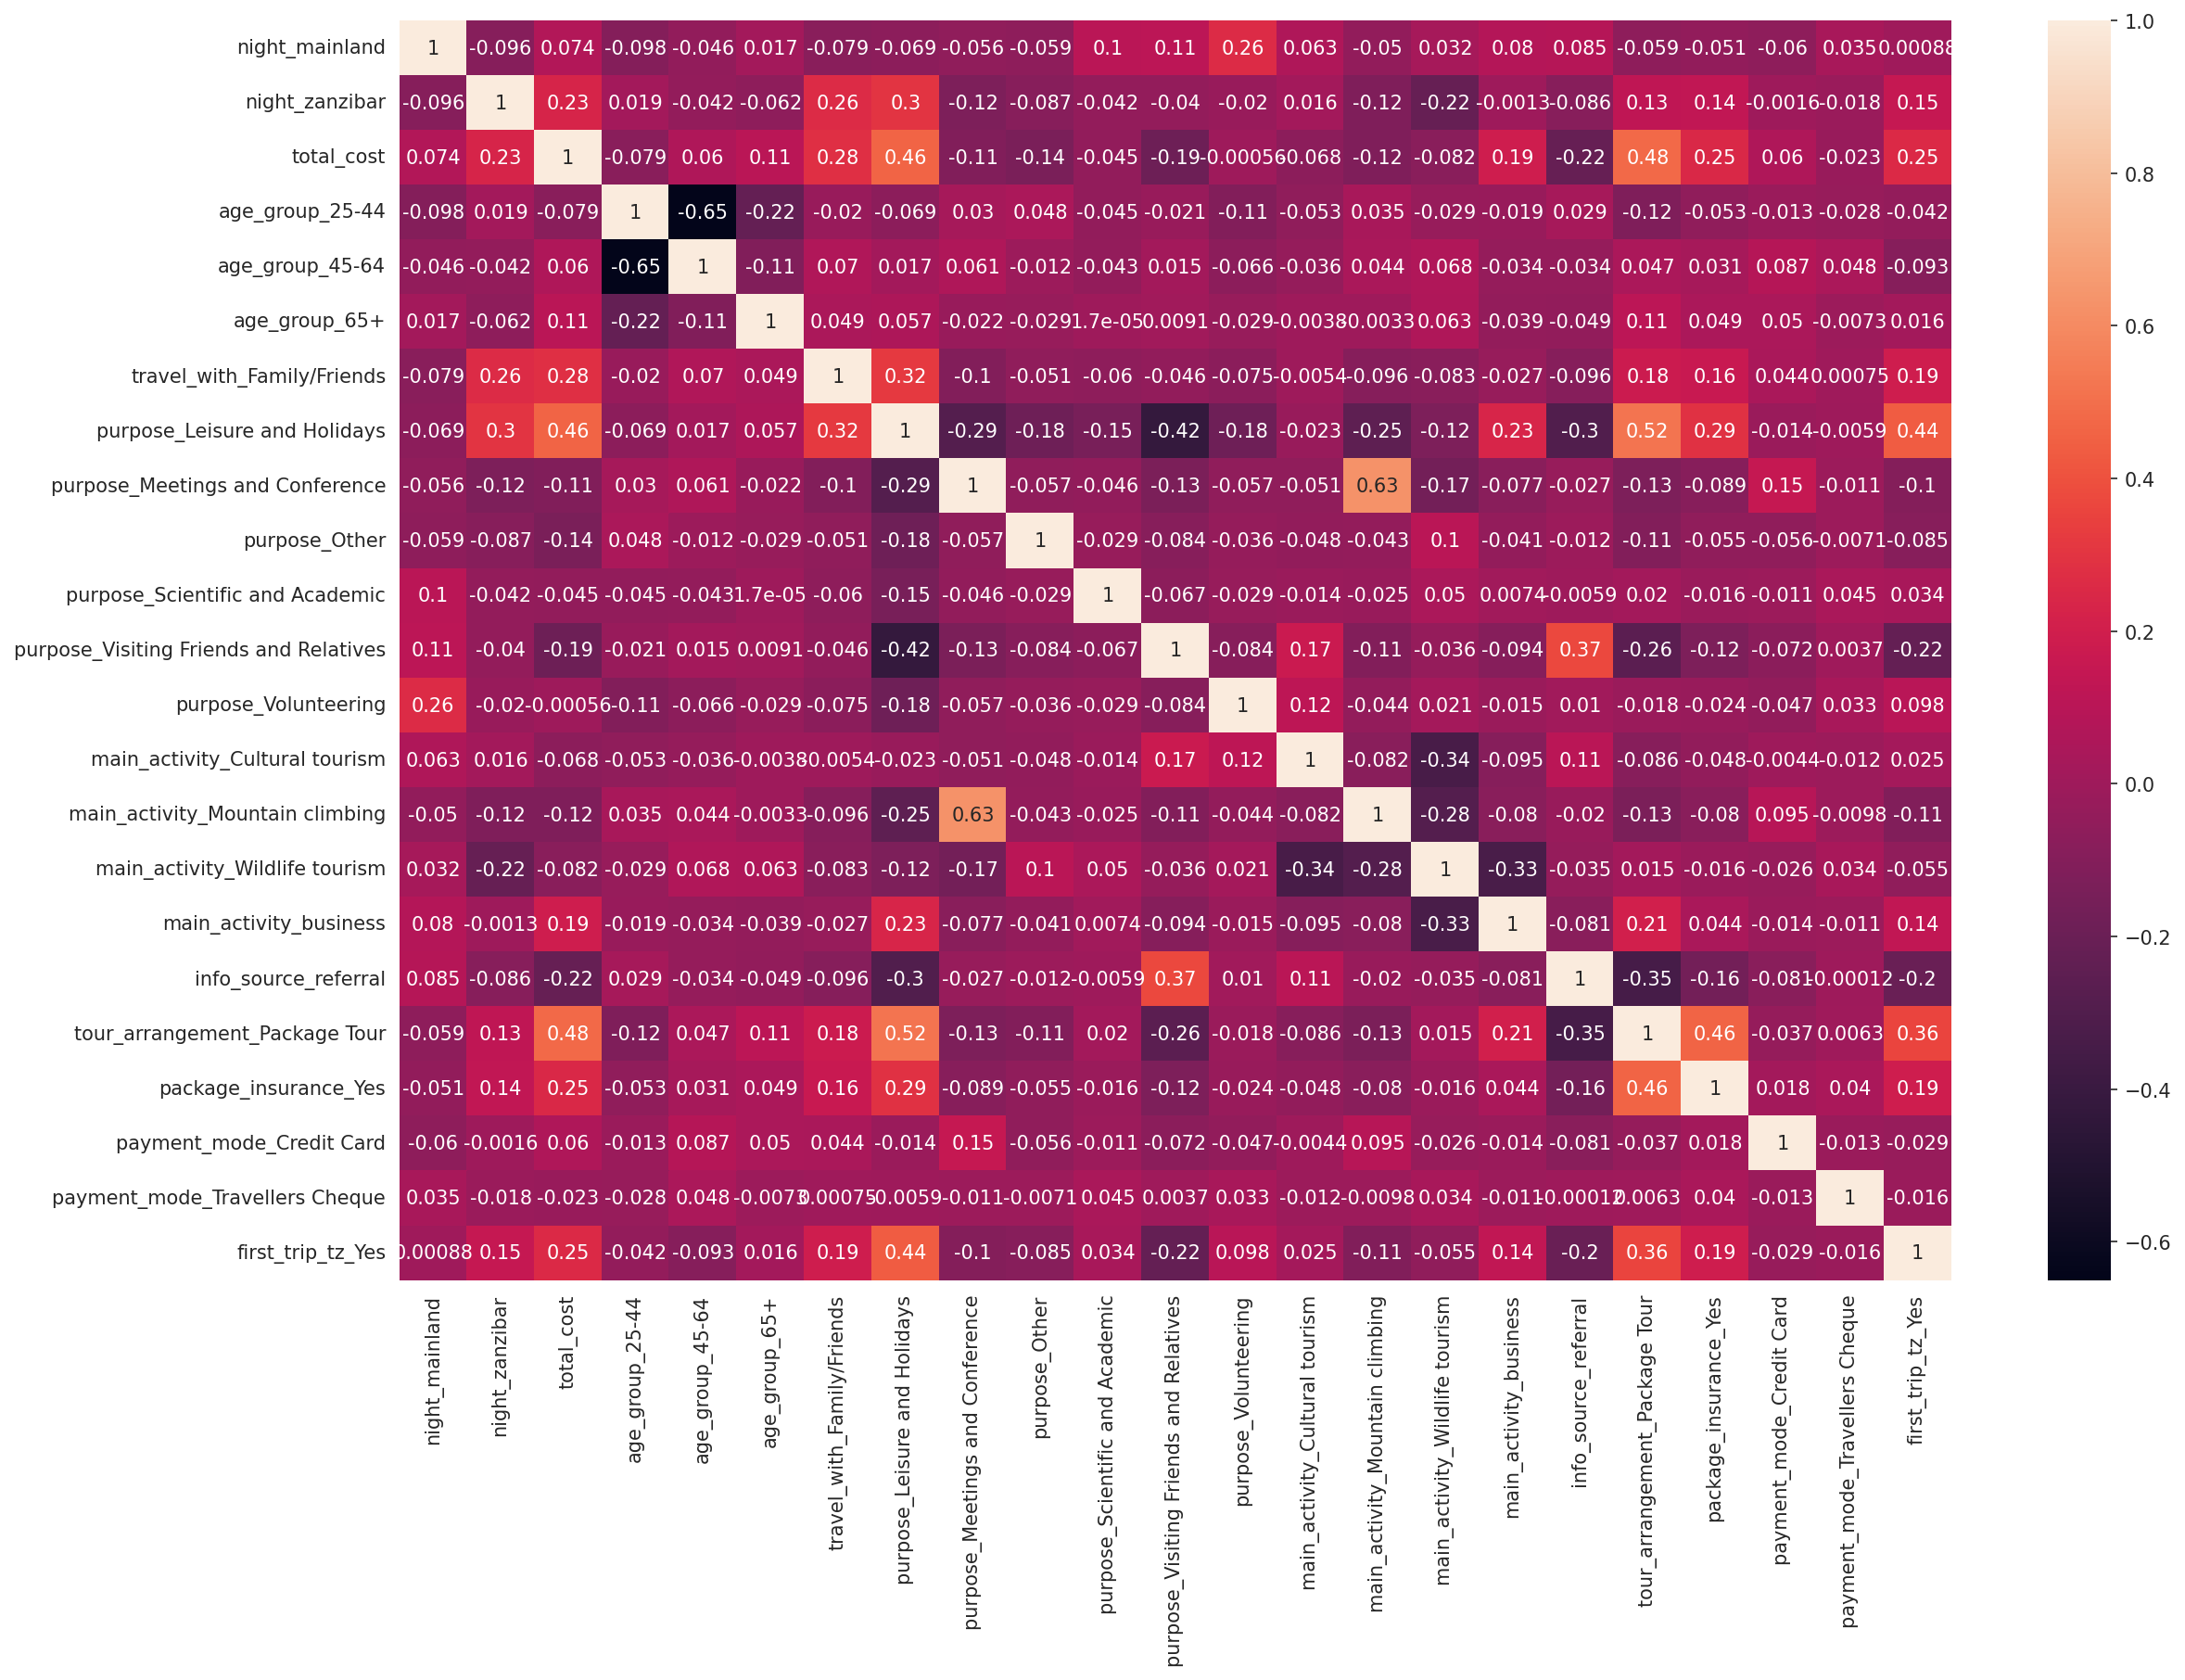

In [ ]:
# A correlation plot of the remaining features
plt.figure(figsize=(18,12),dpi=150)
sns.heatmap(df.corr(),annot=True)

In [ ]:
# The data type where all the features and tha variable belong to
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 4807
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   night_mainland                          3593 non-null   int64  
 1   night_zanzibar                          3593 non-null   int64  
 2   total_cost                              3593 non-null   float64
 3   age_group_25-44                         3593 non-null   uint8  
 4   age_group_45-64                         3593 non-null   uint8  
 5   age_group_65+                           3593 non-null   uint8  
 6   travel_with_Family/Friends              3593 non-null   uint8  
 7   purpose_Leisure and Holidays            3593 non-null   uint8  
 8   purpose_Meetings and Conference         3593 non-null   uint8  
 9   purpose_Other                           3593 non-null   uint8  
 10  purpose_Scientific and Academic         3593 non-null   uint

In [ ]:
# A summary view of the variables that are left in the df dataset
pd.set_option('display.max_rows', None)
print(df.apply(lambda col: col.unique()))

night_mainland                            [13, 14, 1, 11, 7, 9, 10, 4, 5, 17, 30, 2, 0, ...
night_zanzibar                            [0, 7, 31, 4, 3, 2, 11, 6, 5, 1, 30, 13, 9, 10...
total_cost                                [674602.5, 3214906.5, 3315000.0, 7790250.0, 16...
age_group_25-44                                                                      [0, 1]
age_group_45-64                                                                      [1, 0]
age_group_65+                                                                        [0, 1]
travel_with_Family/Friends                                                           [1, 0]
purpose_Leisure and Holidays                                                         [1, 0]
purpose_Meetings and Conference                                                      [0, 1]
purpose_Other                                                                        [0, 1]
purpose_Scientific and Academic                                                 

In [ ]:
# A view of the variables that are left in the testing datadet that is going to be used in prediction
pd.set_option('display.max_rows', None)
print(df_test.apply(lambda col: col.unique()))

night_mainland                            [10, 13, 7, 0, 55, 9, 26, 3, 30, 6, 21, 5, 2, ...
night_zanzibar                            [3, 0, 14, 4, 9, 6, 7, 15, 2, 5, 13, 12, 11, 1...
age_group_25-44                                                                      [0, 1]
age_group_45-64                                                                      [1, 0]
age_group_65+                                                                        [0, 1]
travel_with_Family/Friends                                                           [1, 0]
purpose_Leisure and Holidays                                                         [1, 0]
purpose_Meetings and Conference                                                      [0, 1]
purpose_Other                                                                        [0, 1]
purpose_Scientific and Academic                                                      [0, 1]
purpose_Visiting Friends and Relatives                                          

In [ ]:
# Obtaining the features for the regression model
X=df.drop('total_cost',axis=1)

In [ ]:
# obtaining the label for the regression model
y=df['total_cost']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
###The fitting and transforming the test features of the dataset 
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
####Transforming the features of the test dataset
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# The base elastic model to be fitted 1000000 times
base_elastic_model=ElasticNet(max_iter=1000000)

In [ ]:
### Obtaining the parameter grid for the alpha values and the l1_ratio
param_grid={"alpha":[np.linspace(0,1,10),1,5,10,100],"l1_ratio":np.linspace(0,1,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# The grid search cross validation for parameter tuning
grid_model=GridSearchCV(base_elastic_model,param_grid=param_grid,scoring="neg_mean_squared_error",cv=10,verbose=1)

In [ ]:
# Fitting the training data to the model 
grid_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.511e+15, tolerance: 2.133e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.531e+15, tolerance: 2.135e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/p

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                   1, 5, 10, 100],
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# The best parameters of the model
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1.0}

In [ ]:
##The predictions of the model using features of the training data
y_predictions=grid_model.predict(X_test_scaled)

In [ ]:
# The test metrics for the regression model
from sklearn.metrics import mean_absolute_error

In [ ]:
# The mean absolute error for the model
mean_absolute_error(y_test,y_predictions)

1630890.9574115372

In [ ]:
df.tail()

,night_mainland,night_zanzibar,total_cost,age_group_25-44,age_group_45-64,age_group_65+,travel_with_Family/Friends,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,...,main_activity_Cultural tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,info_source_referral,tour_arrangement_Package Tour,package_insurance_Yes,payment_mode_Credit Card,payment_mode_Travellers Cheque,first_trip_tz_Yes
4802,10,5,6464250.0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4803,12,7,331500.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4804,2,0,3315000.0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4806,3,7,2246636.7,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4807,5,0,1160250.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_test=scaler.transform(df_test)

In [ ]:
grid_model.predict(df_test)

array([5354021.18374326, 3746007.16075582, 3992093.23316913, ...,
       1069622.51915212,  736944.69940244, 3066068.84441305])